In [61]:
# Librerías
import pandas as pd
from sklearn.model_selection import train_test_split
# Becnhmark models
from sklearn import svm
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
# Escalamiento de datos
from sklearn.preprocessing import StandardScaler
# Warnings
import warnings
warnings.filterwarnings('ignore')
# Internal tool and helpers
import model_helpers as mh

In [62]:
data_path = "../CHESS/data/df_2_cod.csv"
df_2_cod = pd.read_csv(data_path)

In [63]:
# X e Y 
df = df_2_cod.copy()
y_name = "winner_cod"
# X es el dataframe eliminando la variable de salida. Eliminando también 'moves' que ya está representado
X = df.drop(columns=[y_name, 'game_id', 'white_rating', 'black_rating', 'moves', 'current_turn_cod', 'opening_moves', 'rated_cod', 'current_turn_cod', 'time_increment_cod', 'opening_code_cod', 'opening_fullname_cod'])
# Y es un array unidimensional (ravel) de la variable de salida
Y = df[y_name].ravel()
X.columns

Index(['turns', 'ctrld_pawn', 'ctrld_knight', 'ctrld_bishop', 'ctrld_rook',
       'ctrld_queen', 'ctrld_king', 'preassure_points', 'controlled_diagonals',
       'controlled_lines', 'opening_shortname_cod', 'opening_variation_cod',
       'moves_fen_cod'],
      dtype='object')

In [64]:
# división en train y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3)

# XGboost

In [65]:
# Crear un clasificador XGBoost
xgboost = xgb.XGBClassifier()
# Entrenar el modelo en los datos de entrenamiento
xgboost.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [66]:
Yhat_xgboost_test = xgboost.predict(X_test)
Yhat_xgboost_train = xgboost.predict(X_train)
mh.eval_perform_class(Y_test,Yhat_xgboost_test, "Prueba", True)
mh.eval_perform_class(Y_train,Yhat_xgboost_train, "Entrenamiento", True)


Performance del modelo de Prueba
Accu 0.8411432369557993 
 Prec 0.8284427815561891 
 Reca 0.8411432369557993

Performance del modelo de Entrenamiento
Accu 0.951068376068376 
 Prec 0.9512080264118894 
 Reca 0.951068376068376


(0.951068376068376, 0.9512080264118894, 0.951068376068376)

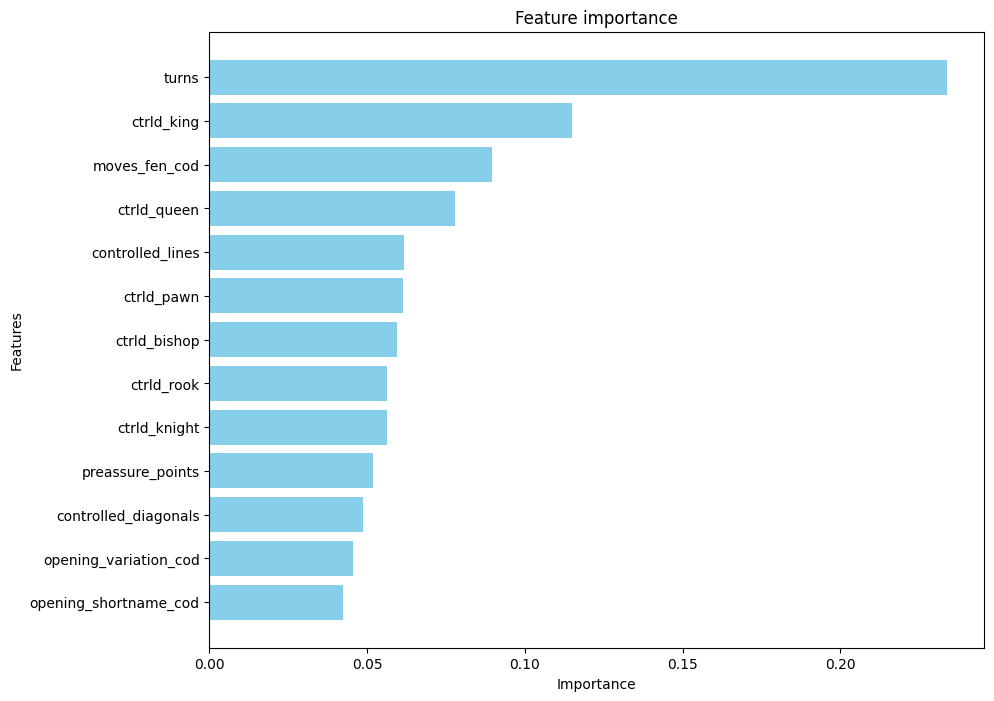

In [67]:
import matplotlib.pyplot as plt
# Feature importance
importance = xgboost.feature_importances_

df_importancia = pd.DataFrame({
    'Caracteristica': X.columns,
    'Importancia': importance
})

umbral = 0
# Filtrar los nombres de las características importantes
df_importancia = df_importancia[df_importancia['Importancia'] > umbral]
df_importancia = df_importancia.sort_values(by='Importancia', ascending=True)

features = df_importancia['Caracteristica']
importance = df_importancia['Importancia']


# Crear un gráfico de barras horizontal
plt.figure(figsize=(10, 8))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature importance')
plt.show()